###  Importing necessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl

### Importing data

In [56]:
df = pd.read_csv('Downloads\police.csv')

In [57]:
df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Data cleaning and preparing for analysis

#### Checking for null values in a whole DataFrame

In [58]:
df.isnull().values.any()

True

#### Checking for null values in a county_name column

In [59]:
df['county_name'].isnull().sum()

91741

#### Dropping a column which contains only null values

In [60]:
df = df.drop(columns='county_name')

In [61]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


#### Checking for null values in a driver_age_raw column

In [62]:
df['driver_age_raw'].isnull().sum()

5327

#### Renaming driver_age_raw column because its not useful

In [63]:
df = df.rename(columns={'driver_age_raw': 'year_of_birth'})

In [64]:
df

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


#### Checking for null values in a driver_age column

In [65]:
df['driver_age'].isnull().sum()

5621

#### Summing all  null values in a whole DataFrame

In [66]:
df.isnull().values.sum()

136826

#### Dropping all rows which contain null values

In [67]:
df = df.dropna()

In [68]:
df.head()

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
24,2005-08-28,01:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False
40,2005-10-01,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
41,2005-10-01,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
80,2005-10-02,09:30,M,1975.0,30.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False
106,2005-10-03,14:00,M,1978.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False


#### Resetting the index

In [69]:
df = df.reset_index(drop=True)

In [70]:
df

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-08-28,01:00,M,1979.0,26.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False
1,2005-10-01,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
2,2005-10-01,00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
3,2005-10-02,09:30,M,1975.0,30.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False
4,2005-10-03,14:00,M,1978.0,27.0,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2015-12-18,09:30,M,1966.0,49.0,White,Registration Violation,Registration/plates,True,Incident to Arrest,No Action,False,16-30 Min,False
3189,2015-12-21,01:39,M,1986.0,29.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Citation,False,0-15 Min,False
3190,2015-12-28,11:05,F,1996.0,19.0,White,APB,Other,True,Incident to Arrest,Citation,False,16-30 Min,True
3191,2015-12-30,08:51,F,1987.0,28.0,Hispanic,Speeding,Speeding,True,"Probable Cause,Reasonable Suspicion",Citation,False,30+ Min,True


#### Converting driver age from float to int values

In [71]:
df['driver_age'] = df['driver_age'].astype(int) 

In [72]:
df

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-08-28,01:00,M,1979.0,26,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False
1,2005-10-01,00:00,M,1988.0,17,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
2,2005-10-01,00:00,M,1988.0,17,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
3,2005-10-02,09:30,M,1975.0,30,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False
4,2005-10-03,14:00,M,1978.0,27,Black,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,16-30 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2015-12-18,09:30,M,1966.0,49,White,Registration Violation,Registration/plates,True,Incident to Arrest,No Action,False,16-30 Min,False
3189,2015-12-21,01:39,M,1986.0,29,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Citation,False,0-15 Min,False
3190,2015-12-28,11:05,F,1996.0,19,White,APB,Other,True,Incident to Arrest,Citation,False,16-30 Min,True
3191,2015-12-30,08:51,F,1987.0,28,Hispanic,Speeding,Speeding,True,"Probable Cause,Reasonable Suspicion",Citation,False,30+ Min,True


#### Converting year of birth from float to int values

In [73]:
df['year_of_birth'] = df['year_of_birth'].astype(int) 

#### Creating a dictionary to replace values in DataFrame so they make more sense

In [74]:
replace_dict = {'search_conducted' : { True : 'Yes', False : 'No' },
           'is_arrested' : { True : 'Yes', False : 'No' },
           'drugs_related_stop' : { True : 'Yes', False : 'No' },
            'driver_gender' : { 'M' : 'Male', 'F' : 'Female' }}

#### Replacing the values using a dictionary we just created

In [75]:
df.replace(replace_dict, inplace=True)

In [76]:
df

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-08-28,01:00,Male,1979,26,White,Other Traffic Violation,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,16-30 Min,No
1,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Arrest Driver,Yes,16-30 Min,Yes
2,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,30+ Min,Yes
3,2005-10-02,09:30,Male,1975,30,White,Speeding,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30+ Min,No
4,2005-10-03,14:00,Male,1978,27,Black,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,16-30 Min,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2015-12-18,09:30,Male,1966,49,White,Registration Violation,Registration/plates,Yes,Incident to Arrest,No Action,No,16-30 Min,No
3189,2015-12-21,01:39,Male,1986,29,White,Other Traffic Violation,Moving violation,Yes,Incident to Arrest,Citation,No,0-15 Min,No
3190,2015-12-28,11:05,Female,1996,19,White,APB,Other,Yes,Incident to Arrest,Citation,No,16-30 Min,Yes
3191,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30+ Min,Yes


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Graphs

#### Checking how many different race values our DataFrame contains

In [77]:
df.driver_race.value_counts()

White       1766
Black        789
Hispanic     584
Asian         51
Other          3
Name: driver_race, dtype: int64

#### Plotting a graph for different race values

<AxesSubplot:>

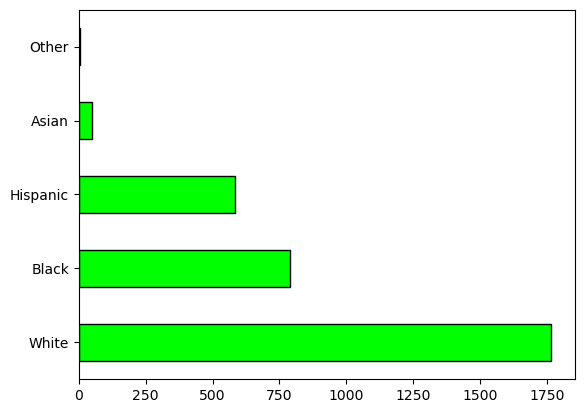

In [78]:
df.driver_race.value_counts().plot(kind="barh", color="lime", edgecolor = "black")


#### Searching for Other race values and assigning them to a new DataFrame

In [79]:
df_other = df.loc[df['driver_race']=='Other']

In [80]:
df_other

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
1430,2009-07-31,13:41,Male,1965,44,Other,Registration Violation,Registration/plates,Yes,Incident to Arrest,Arrest Passenger,Yes,16-30 Min,No
2872,2014-07-29,19:56,Male,1991,23,Other,Seatbelt Violation,Seat belt,Yes,Probable Cause,Citation,No,30+ Min,Yes
3147,2015-09-16,14:20,Male,1974,41,Other,Other Traffic Violation,Moving violation,Yes,Inventory,Citation,No,30+ Min,No


#### Checking how many different gender values our DataFrame contains

In [81]:
df.driver_gender.value_counts()

Male      2722
Female     471
Name: driver_gender, dtype: int64

#### Plotting a graph for different gender values

<AxesSubplot:>

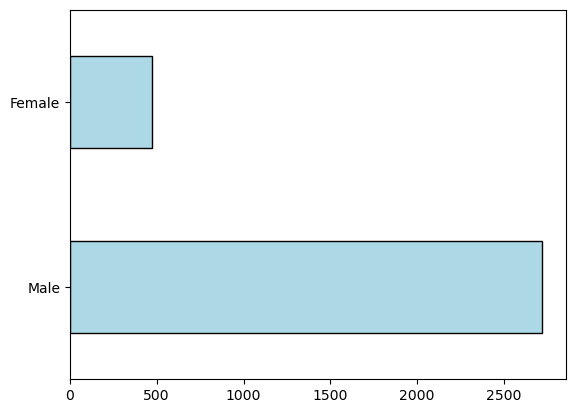

In [82]:
df.driver_gender.value_counts().plot(kind="barh", color="lightblue", edgecolor = "black")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Adding new columns, further cleaning and exporting

#### Added a column with badge numbers for police officers who have stopped the drivers

In [83]:
badge_numbers = list(range(100, 110))


stopped_by_values = []

for i in range(len(df)):
    
    value_to_insert = badge_numbers[i % len(badge_numbers)]
    stopped_by_values.append(value_to_insert)

df['stopped_by'] = stopped_by_values

In [84]:
df

,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by
0,2005-08-28,01:00,Male,1979,26,White,Other Traffic Violation,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,16-30 Min,No,100
1,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Arrest Driver,Yes,16-30 Min,Yes,101
2,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,30+ Min,Yes,102
3,2005-10-02,09:30,Male,1975,30,White,Speeding,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30+ Min,No,103
4,2005-10-03,14:00,Male,1978,27,Black,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,16-30 Min,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2015-12-18,09:30,Male,1966,49,White,Registration Violation,Registration/plates,Yes,Incident to Arrest,No Action,No,16-30 Min,No,108
3189,2015-12-21,01:39,Male,1986,29,White,Other Traffic Violation,Moving violation,Yes,Incident to Arrest,Citation,No,0-15 Min,No,109
3190,2015-12-28,11:05,Female,1996,19,White,APB,Other,Yes,Incident to Arrest,Citation,No,16-30 Min,Yes,100
3191,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30+ Min,Yes,101


#### Added a column with IDs for each row in the DataFrame

In [85]:
case_id_data = list(range(1, 3194))

In [86]:
df.insert(0, 'case_id', case_id_data)

In [87]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,Other Traffic Violation,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,16-30 Min,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Arrest Driver,Yes,16-30 Min,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,30+ Min,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30+ Min,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment/Inspection Violation,Equipment,Yes,Probable Cause,Citation,No,16-30 Min,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration Violation,Registration/plates,Yes,Incident to Arrest,No Action,No,16-30 Min,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,Other Traffic Violation,Moving violation,Yes,Incident to Arrest,Citation,No,0-15 Min,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,APB,Other,Yes,Incident to Arrest,Citation,No,16-30 Min,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30+ Min,Yes,101


### Dropping violation_raw column

In [88]:
df = df.drop(columns='violation_raw')

In [89]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,16-30 Min,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Arrest Driver,Yes,16-30 Min,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Citation,No,30+ Min,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30+ Min,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment,Yes,Probable Cause,Citation,No,16-30 Min,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration/plates,Yes,Incident to Arrest,No Action,No,16-30 Min,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,Moving violation,Yes,Incident to Arrest,Citation,No,0-15 Min,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,Other,Yes,Incident to Arrest,Citation,No,16-30 Min,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30+ Min,Yes,101


### Removing + and M values in stop_duration column

In [90]:
df['stop_duration'] = df['stop_duration'].str.replace(r'[a-zA-Z+]', '', regex=True)

In [91]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,16-30,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Arrest Driver,Yes,16-30,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Citation,No,30,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment,Yes,Probable Cause,Citation,No,16-30,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration/plates,Yes,Incident to Arrest,No Action,No,16-30,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,Moving violation,Yes,Incident to Arrest,Citation,No,0-15,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,Other,Yes,Incident to Arrest,Citation,No,16-30,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30,Yes,101


### Replacing - values with , values in stop_duration column

In [92]:
df['stop_duration'] = df['stop_duration'].str.replace('-', ',')

In [93]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,"16,30",No,100
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Arrest Driver,Yes,"16,30",Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Citation,No,30,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment,Yes,Probable Cause,Citation,No,"16,30",No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration/plates,Yes,Incident to Arrest,No Action,No,"16,30",No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,Moving violation,Yes,Incident to Arrest,Citation,No,"0,15",No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,Other,Yes,Incident to Arrest,Citation,No,"16,30",Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30,Yes,101


### Creating a function to find the middle value if column contains more than one value, otherwise keep the same value

In [94]:
def find_middle(entry):
    values = [int(val) for val in entry.split(',') if val.strip().isdigit()]
    if len(values) == 2:
        return sum(values) / 2  # Find the average of the two values for the middle
    elif len(values) == 1:
        return values[0]  # Keep the single value as is
    else:
        return None  # Return None for other cases


### Adding a new column and adding the function results to it

In [95]:
df['result'] = df['stop_duration'].apply(find_middle)

In [96]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by,result
0,1,2005-08-28,01:00,Male,1979,26,White,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,"16,30",No,100,23.0
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Arrest Driver,Yes,"16,30",Yes,101,23.0
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Citation,No,30,Yes,102,30.0
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30,No,103,30.0
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment,Yes,Probable Cause,Citation,No,"16,30",No,104,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration/plates,Yes,Incident to Arrest,No Action,No,"16,30",No,108,23.0
3189,3190,2015-12-21,01:39,Male,1986,29,White,Moving violation,Yes,Incident to Arrest,Citation,No,"0,15",No,109,7.5
3190,3191,2015-12-28,11:05,Female,1996,19,White,Other,Yes,Incident to Arrest,Citation,No,"16,30",Yes,100,23.0
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30,Yes,101,30.0


#### Renaming result column to stopped_time

In [97]:
df = df.rename(columns={"result": "stopped_time"})

#### Changing stopped_time value from float to int value

In [98]:
df['stopped_time'] = df['stopped_time'].astype(int)

In [99]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stopped_by,stopped_time
0,1,2005-08-28,01:00,Male,1979,26,White,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,"16,30",No,100,23
1,2,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Arrest Driver,Yes,"16,30",Yes,101,23
2,3,2005-10-01,00:00,Male,1988,17,White,Equipment,Yes,Probable Cause,Citation,No,30,Yes,102,30
3,4,2005-10-02,09:30,Male,1975,30,White,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,30,No,103,30
4,5,2005-10-03,14:00,Male,1978,27,Black,Equipment,Yes,Probable Cause,Citation,No,"16,30",No,104,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,Registration/plates,Yes,Incident to Arrest,No Action,No,"16,30",No,108,23
3189,3190,2015-12-21,01:39,Male,1986,29,White,Moving violation,Yes,Incident to Arrest,Citation,No,"0,15",No,109,7
3190,3191,2015-12-28,11:05,Female,1996,19,White,Other,Yes,Incident to Arrest,Citation,No,"16,30",Yes,100,23
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,30,Yes,101,30


#### Dropping old stop_duration column

In [100]:
df = df.drop(columns='stop_duration')

#### Changing order of the newly added column stopped_time

In [101]:
column_to_move = 'stopped_time'
new_position = 7

#### Moving stopped_time column to the new position

In [102]:
df.insert(new_position, column_to_move, df.pop('stopped_time'))

In [103]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,stopped_time,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,30,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,Yes,101


#### Renaming stopped_time column to stop_duration_in_minutes

In [104]:
df = df.rename(columns={"stopped_time": "stop_duration_in_minutes"})

In [105]:
df

,case_id,stop_date,stop_time,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,"Incident to Arrest,Protective Frisk",Arrest Driver,Yes,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,30,Speeding,Yes,"Probable Cause,Reasonable Suspicion",Citation,No,Yes,101


#### Renaming stop_time column to stopped_at

In [106]:
df = df.rename(columns={"stop_time": "stopped_at"})

#### Replacing , values with - values in search_type column

In [107]:
df['search_type'] = df['search_type'].str.replace(',', '-')

In [108]:
df

,case_id,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
0,1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
1,2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
2,3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
3,4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
4,5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3189,3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3190,3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100
3191,3192,2015-12-30,08:51,Female,1987,28,Hispanic,30,Speeding,Yes,Probable Cause-Reasonable Suspicion,Citation,No,Yes,101


#### Setting case_id column as DataFrame index

In [109]:
df.set_index('case_id')

,stop_date,stopped_at,driver_gender,year_of_birth,driver_age,driver_race,stop_duration_in_minutes,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,stopped_by
case_id,,,,,,,,,,,,,,
1,2005-08-28,01:00,Male,1979,26,White,23,Moving violation,Yes,Incident to Arrest-Protective Frisk,Arrest Driver,Yes,No,100
2,2005-10-01,00:00,Male,1988,17,White,23,Equipment,Yes,Probable Cause,Arrest Driver,Yes,Yes,101
3,2005-10-01,00:00,Male,1988,17,White,30,Equipment,Yes,Probable Cause,Citation,No,Yes,102
4,2005-10-02,09:30,Male,1975,30,White,30,Speeding,Yes,Incident to Arrest,Arrest Driver,Yes,No,103
5,2005-10-03,14:00,Male,1978,27,Black,23,Equipment,Yes,Probable Cause,Citation,No,No,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2015-12-18,09:30,Male,1966,49,White,23,Registration/plates,Yes,Incident to Arrest,No Action,No,No,108
3190,2015-12-21,01:39,Male,1986,29,White,7,Moving violation,Yes,Incident to Arrest,Citation,No,No,109
3191,2015-12-28,11:05,Female,1996,19,White,23,Other,Yes,Incident to Arrest,Citation,No,Yes,100


#### Exporting cleaned DataFrame

In [110]:
file_path = 'Downloads\police_cleaned.csv'


df.to_csv(file_path, index=False)